In [ ]:
%pip install statsmodels
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [33]:
df = pd.read_csv('Placement.csv')
df.drop("sl_no", axis=1, inplace=True)
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [45]:
# remove null values from salary column
df = df.fillna(df['salary'].isna())
df = df.fillna(df['salary'].mean())
df.isna().sum()



gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

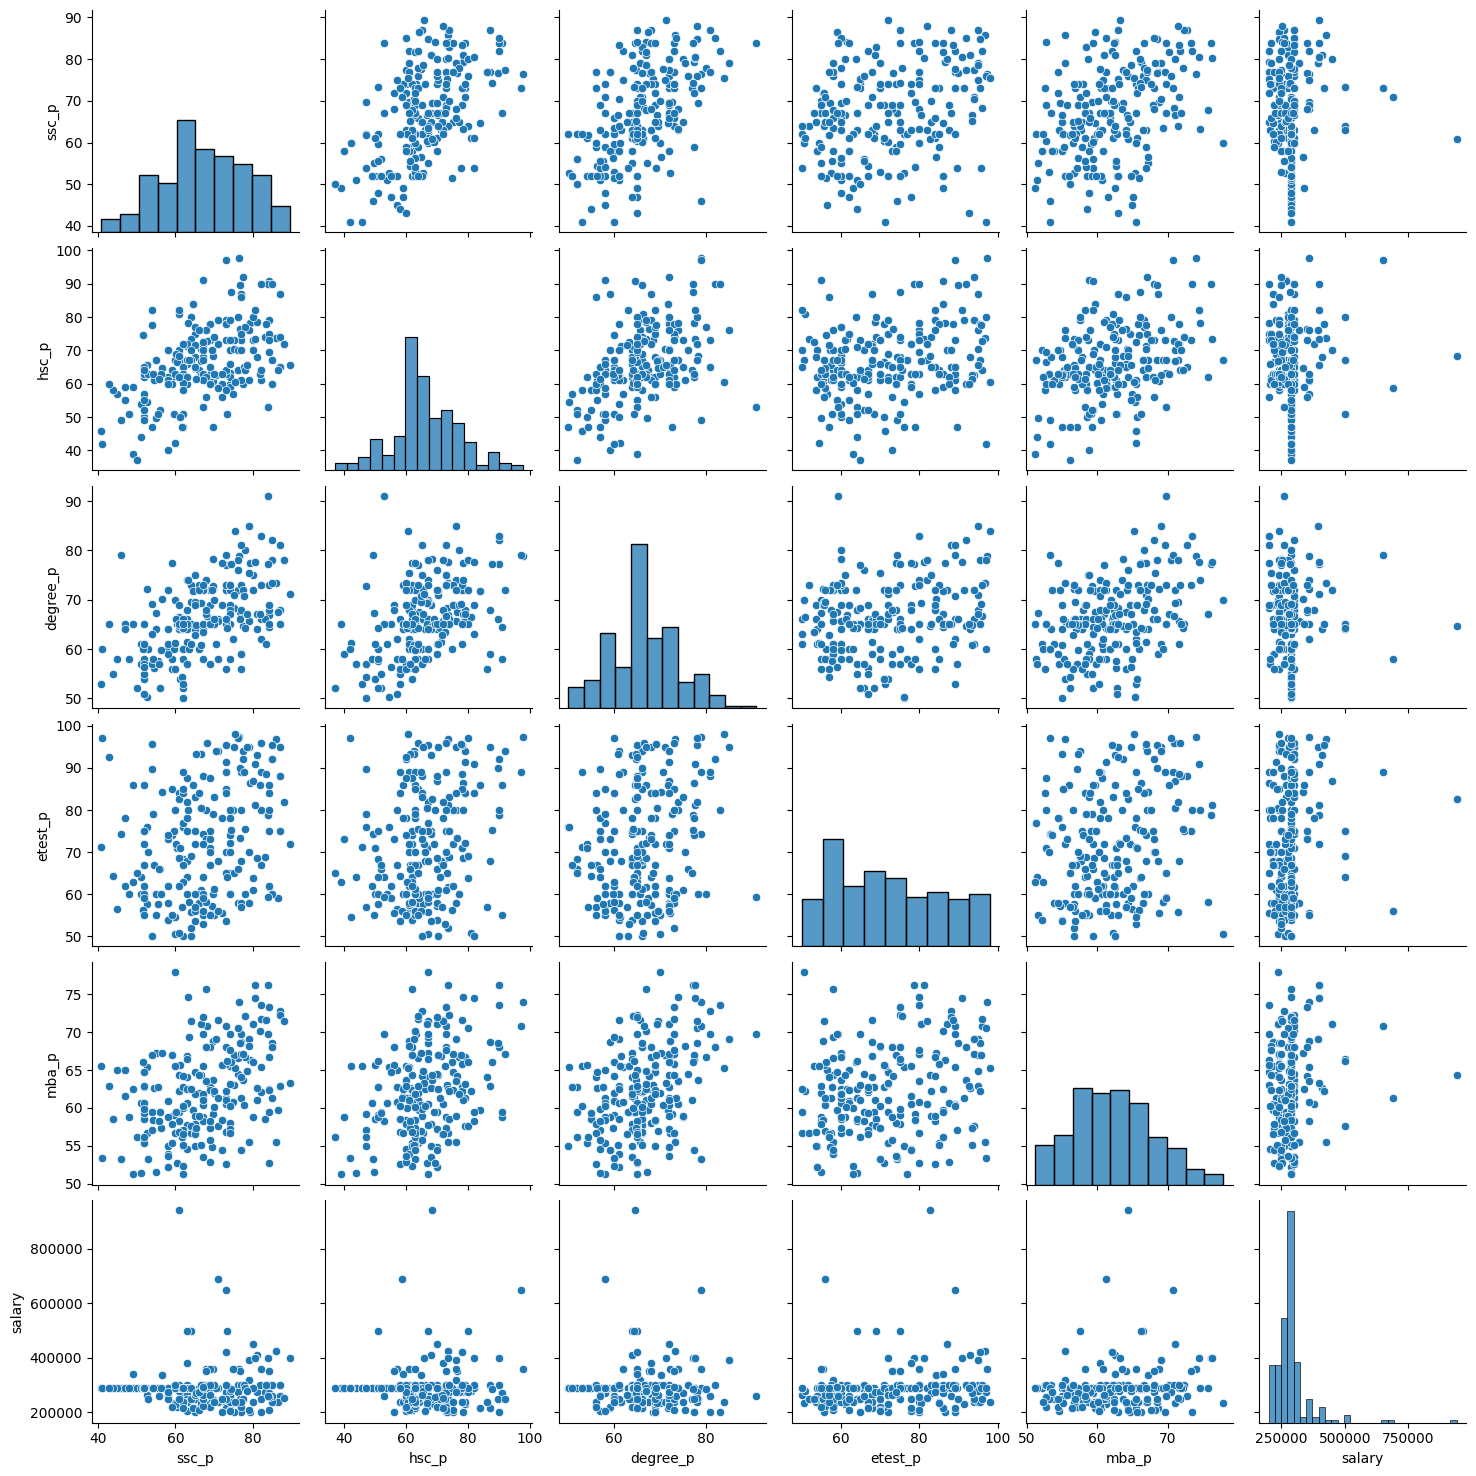

In [15]:
sns.pairplot(df)
plt.show()

In [46]:
def cal_variance_inflation_factor(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns #df.select_dtypes(include=[np.number]).columns
    #vif_data["VIF"] = [variance_inflation_factor(df.select_dtypes(include=[np.number]).values, i)
    vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                       for i in range(df.shape[1])]
    return vif_data 

In [47]:
cal_variance_inflation_factor(df[["etest_p","salary"]])

,feature,VIF
0,etest_p,11.944567
1,salary,11.944567


## Option 1 to find Multi-Collinearity using 
# Eigenvalues of Correlation Matrix


In [28]:
import numpy as np

corr_matrix = df.select_dtypes(include=[np.number]).corr()
eigenvalues = np.linalg.eigvals(corr_matrix)

print("Eigenvalues:", eigenvalues)
# Very small eigenvalues (near 0) indicate multicollinearity


Eigenvalues: [2.48859125 1.08122727 0.44030857 0.54786321 0.64388978 0.79811993]


## Option 2 to find Multi-Collinearity using  -- Tolerance (Inverse of VIF)

#### Tolerance < 0.1 indicates multicollinearity (equivalent to VIF > 10)

In [48]:
def calculate_tolerance(df):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    
    tolerance_data = pd.DataFrame()
    numeric_df = df.select_dtypes(include=[np.number])
    
    tolerance_data["feature"] = numeric_df.columns
    tolerance_data["Tolerance"] = [
        1 / variance_inflation_factor(numeric_df.values, i)
        for i in range(len(numeric_df.columns))
    ]
    
    return tolerance_data
calculate_tolerance(df)

,feature,Tolerance
0,ssc_p,0.014919
1,hsc_p,0.017815
2,degree_p,0.008869
3,etest_p,0.029677
4,mba_p,0.009209
5,salary,0.065930


## Option 3: Correlation Matrix

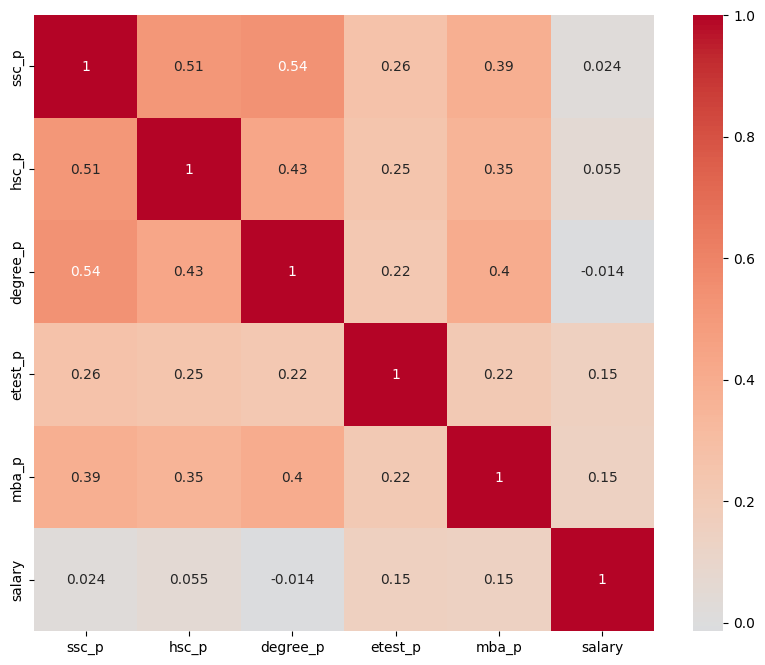

Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []


In [32]:
# corr_matrix = df.corr()
# print(corr_matrix)

corr_matrix = df.select_dtypes(include=[np.number]).corr()

# Visualize with heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()

# Find high correlations
threshold = 0.8
high_corr = corr_matrix[(corr_matrix > threshold) | (corr_matrix < -threshold)]
high_corr = high_corr.stack().reset_index()
high_corr = high_corr[high_corr['level_0'] != high_corr['level_1']]
high_corr.columns = ['Feature 1', 'Feature 2', 'Correlation']
print(high_corr)